In [15]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt 

def solid_sphere(R,npoints):
    phi=np.random.uniform(low=0, high=2*np.pi, size=(1,npoints))
    costheta=np.random.uniform(low=-1, high=1, size=(1,npoints))
    u=np.random.uniform(low=0, high=1, size=(1,npoints))
    theta = np.arccos( costheta )
    r = R * np.cbrt(u)
    x = r * np.sin( theta) * np.cos( phi )
    y = r * np.sin( theta) * np.sin( phi )
    z = r * np.cos( theta )
    vec=np.concatenate((x,y,z),axis=0)
    return vec


def hollow_sphere(r,npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return r*vec

def sphere_z(r,center):
    x=np.random.rand(5,1)
    y=np.random.rand(5,1)
    z_plus=center[2]+np.sqrt(r**2-(x-center[0])**2-(y-center[1])**2)
    z_min=center[2]-np.sqrt(r**2-(x-center[0])**2-(y-center[1])**2)
    return [x,y,z_plus,z_min]

def angle_calc_single(point1,point2,point3):
    point12=point2-point1
    point13=point3-point1
    #print(point12)
    #print(point13)
    #print(np.sum(point12*point13,1).reshape(np.shape(point12)[0],1))
    #print(((np.linalg.norm(point12,axis=1) * np.linalg.norm(point13,axis=1)).reshape(np.shape(point12)[0],1)))
    cosine_angle = np.sum(point12*point13,1).reshape(np.shape(point12)[0],1) / ((np.linalg.norm(point12,axis=1) * np.linalg.norm(point13,axis=1)).reshape(np.shape(point12)[0],1))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def angle_total(r,center1,center2,center3,points=1000):
    angle_list=[]
    xi1, yi1, zi1 = solid_sphere(r,points)
    xi2, yi2, zi2 = solid_sphere(r,points)
    xi3, yi3, zi3 = solid_sphere(r,points)
    sphere_around_origin1=np.concatenate((xi1.reshape((xi1.size,1)),yi1.reshape((xi1.size,1)),zi1.reshape((xi1.size,1))),axis=1)
    sphere_around_origin2=np.concatenate((xi2.reshape((xi2.size,1)),yi2.reshape((xi2.size,1)),zi2.reshape((xi2.size,1))),axis=1)
    sphere_around_origin3=np.concatenate((xi3.reshape((xi3.size,1)),yi3.reshape((xi3.size,1)),zi3.reshape((xi3.size,1))),axis=1)
    sphere_around_point1=sphere_around_origin1+center1
    sphere_around_point2=sphere_around_origin2+center2
    sphere_around_point3=sphere_around_origin3+center3
    angle=angle_calc_single(sphere_around_point1,sphere_around_point2,sphere_around_point3)
    return angle

Minimum :  122.7829519774916
Maximum :  179.99816343306432
Average :  158.44849322628352


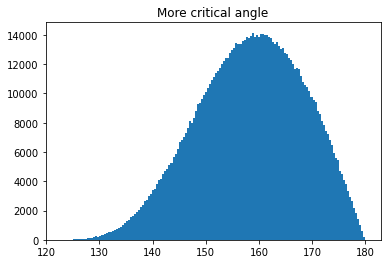

In [35]:
    center1=np.array([21.8290,-240.11992,-26.548]).reshape((1,3))
    center2=np.array([0,0,0]).reshape((1,3))
    center3=np.array([43.65817,-480.239,-53.097]).reshape((1,3))
    r=np.array([65])
    angle=angle_total(r,center1,center2,center3,1000000)
    #unique_ang, counts_ang = np.unique(round_ang, return_counts=True)
    print("Minimum : ",np.min(angle))
    print("Maximum : ",np.max(angle))
    print("Average : ",np.average(angle))
    plt.hist(angle,bins=150) 
    plt.title("More critical angle") 
    plt.show()